# Analysis of model outputs

In [1]:
!open .

In [2]:
output_ppt_file = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_outputs/INAS_RA__a1cu__pres__Ta_qa_v/data/out_001_ppt.dat'

In [3]:
obs_ppt_file = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_obs/INAS/ppt_TRMM_box/PPT_2000-2004.dat'

In [4]:
import numpy as np

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print (rmse(np.array([2,2,3]), np.array([0,2,6])))

2.0816659994661326


In [5]:
obs_ppt = np.loadtxt(fname = obs_ppt_file)


In [6]:
rmse(np.array(output_ppt), np.array(obs_ppt[:364]))

NameError: name 'output_ppt' is not defined

In [7]:
import os

In [8]:
path = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_outputs/INAS_RA__a1cu__pres__Ta_qa_v/data/'
path = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_outputs/INAS_RA__a1st__pres__Ta_qa_v/data/'
path = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_outputs/INAS_RA__tau_p__pres__Ta_qa_v/data/'

exp = 'INAS_RA__a1st__pres__Ta_qa_v'

path = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_outputs/' + exp + '/data/'

import glob
rmse_arr = []

files = glob.glob(path + '*_ppt.dat')
file_param_bif_values = path + 'param_vals.dat'
param_bif_values = np.loadtxt(fname = file_param_bif_values)

for i_file in range(0, len(files)):
    str_i = files[i_file].split('_')[-2]
    
    output_file_ppt = path + 'out_' + str_i + '_ppt.dat'
    output__arr_ppt = np.loadtxt(fname = output_file_ppt)
    len_output_arr  = len(output__arr_ppt)
    
    rmse_this = rmse(np.array(output__arr_ppt), np.array(obs_ppt[:len_output_arr]))
    rmse_arr.append([param_bif_values[i_file], rmse_this])
    
#     print (str_i, rmse_this)

rmse_arr = np.array(rmse_arr)
print (rmse_arr)

[[1.4        8.475018  ]
 [1.43333333 8.46978717]
 [1.46666667 8.46552521]
 [1.5        8.46223361]
 [1.53333333 8.45991348]
 [1.56666667 8.45856563]
 [1.6        8.45819052]
 [1.63333333 8.45878829]
 [1.66666667 8.46035872]
 [1.7        8.46290128]]


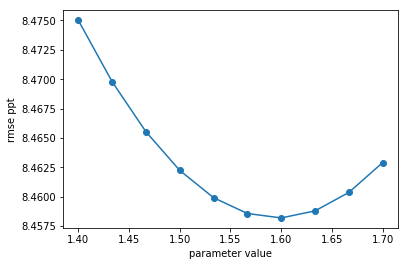

In [9]:
import matplotlib.pyplot as plt

plt.plot(rmse_arr[:,0], rmse_arr[:,1], 'o-')
plt.xlabel('parameter value')
plt.ylabel('rmse ppt')
plt.show()